# Importing Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ml 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.shape

(4240, 16)

In [7]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [8]:
df.fillna(round(df.mean(),2), inplace=True)

In [9]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.shape

(4240, 16)

# Exploratory Analysis

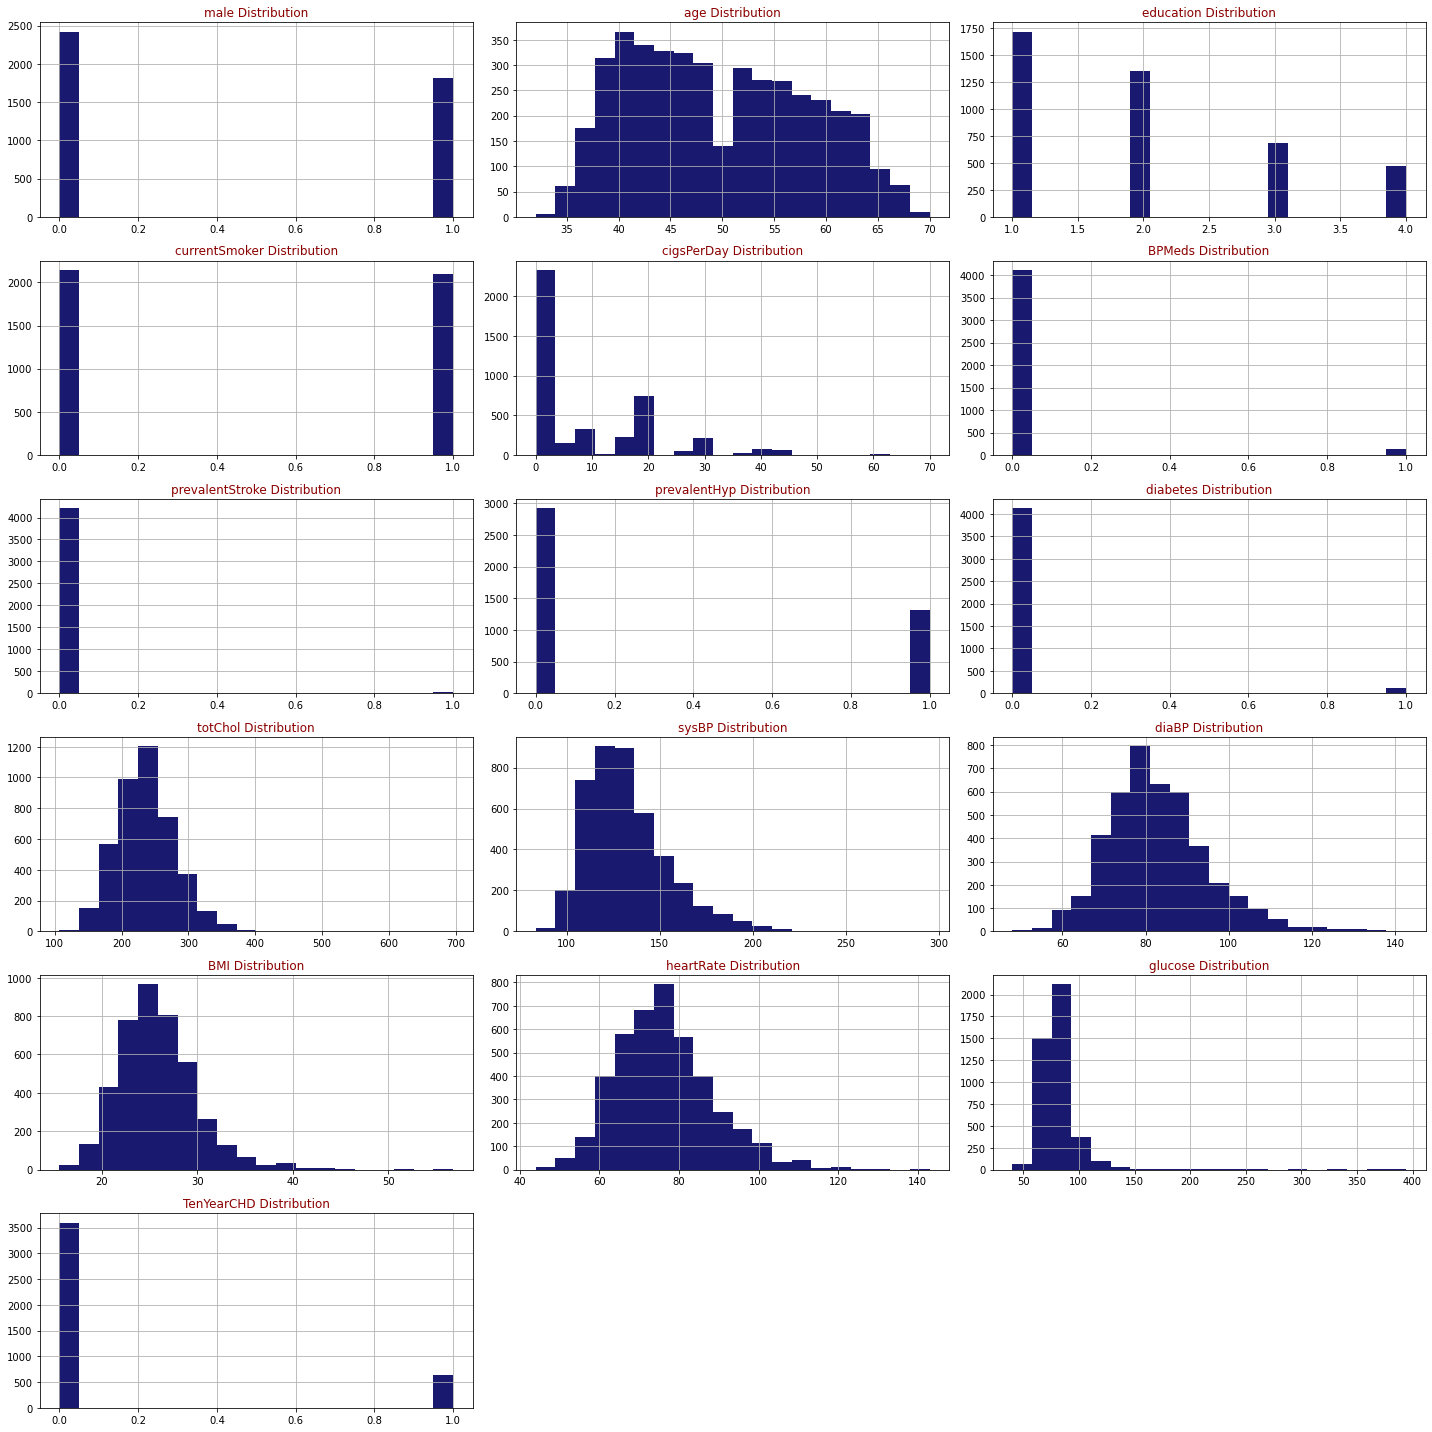

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [12]:
df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

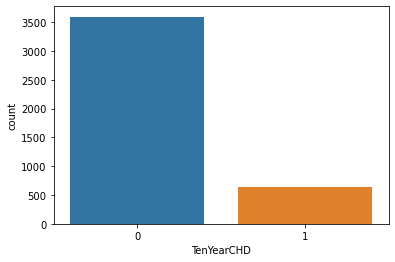

In [13]:
sns.countplot(x='TenYearCHD',data=df)

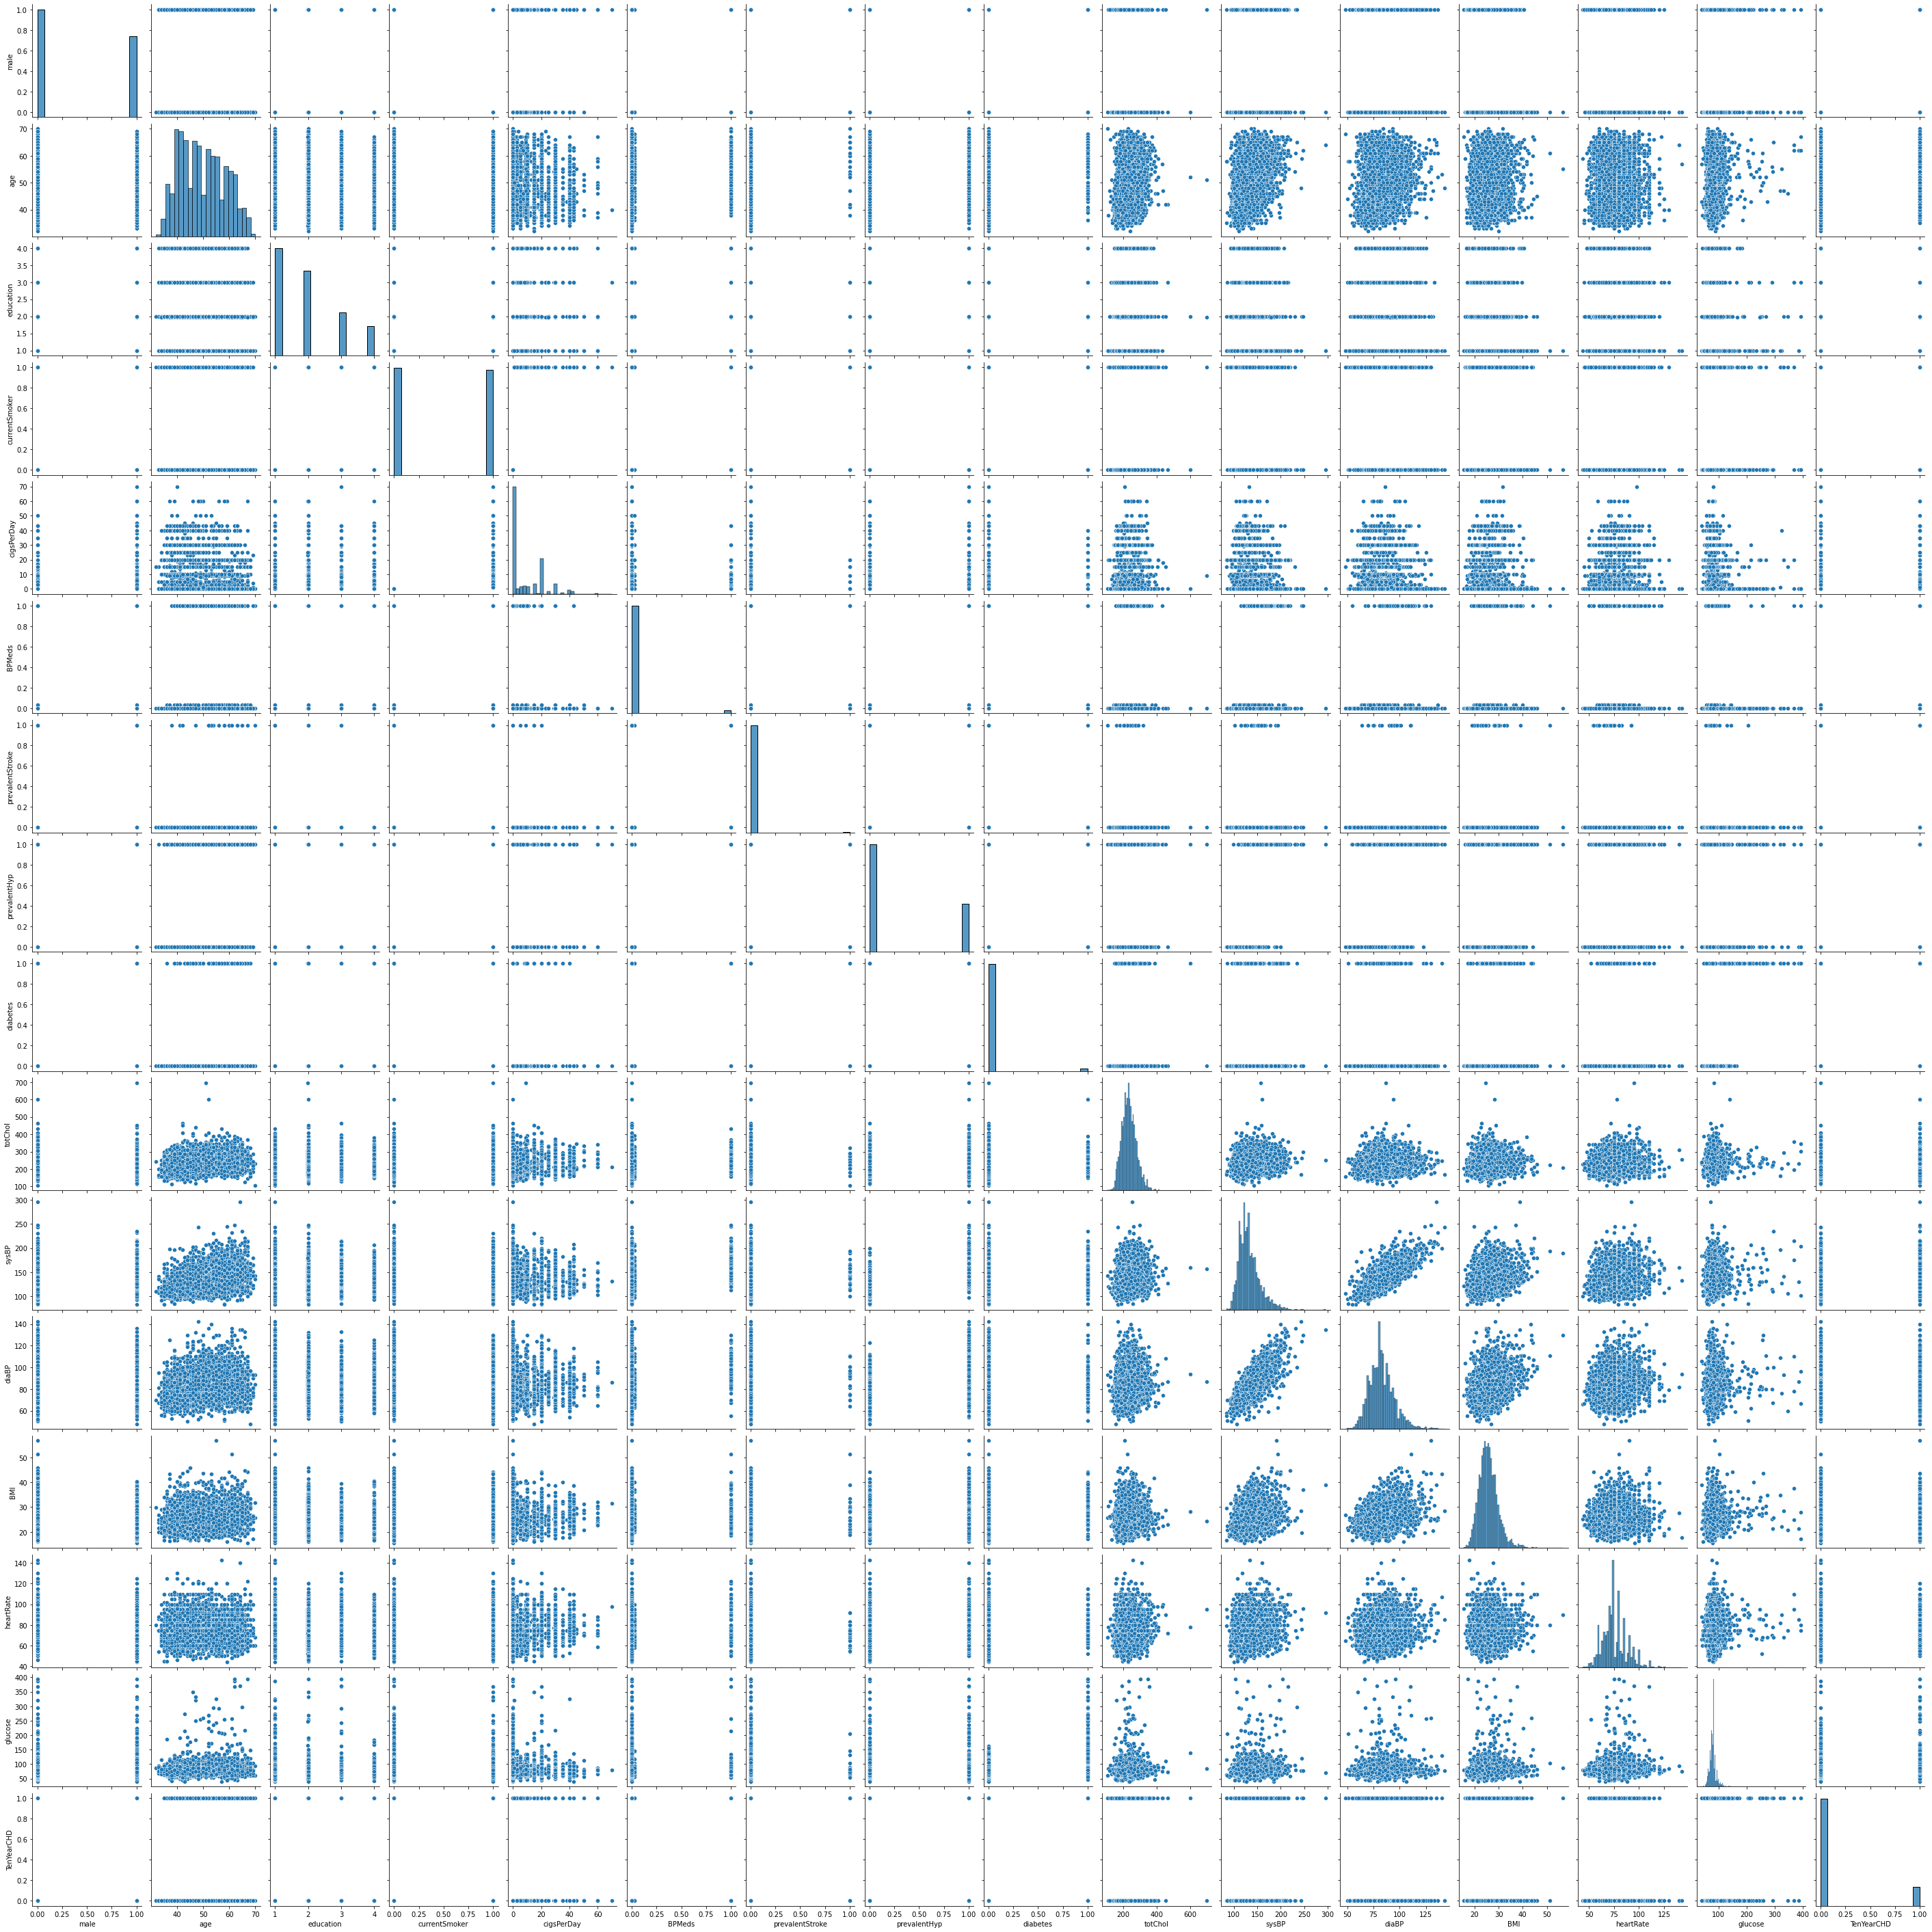

In [33]:
sns.pairplot(data=df)

In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979458,0.494104,9.005965,0.029620,0.005896,0.310613,0.025708,236.699528,132.354599,82.897759,25.800797,75.878981,81.963321,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Define X and Y for Implement Models

In [16]:
X = np.asarray(df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose']])
X[0:5]

array([[  1.  ,  39.  ,   4.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 195.  , 106.  ,  70.  ,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 250.  , 121.  ,  81.  ,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  ,   1.  ,  20.  ,   0.  ,   0.  ,   0.  ,
          0.  , 245.  , 127.5 ,  80.  ,  25.34,  75.  ,  70.  ],
       [  0.  ,  61.  ,   3.  ,   1.  ,  30.  ,   0.  ,   0.  ,   1.  ,
          0.  , 225.  , 150.  ,  95.  ,  28.58,  65.  , 103.  ],
       [  0.  ,  46.  ,   3.  ,   1.  ,  23.  ,   0.  ,   0.  ,   0.  ,
          0.  , 285.  , 130.  ,  84.  ,  23.1 ,  85.  ,  85.  ]])

In [17]:
y = np.asarray(df['TenYearCHD'])
y[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

# Normalize Dataset

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15311332, -1.23428297,  2.00657048, -0.98827627, -0.75806453,
        -0.17582853, -0.07701427, -0.67124101, -0.16243726, -0.94082514,
        -1.19626692, -1.08302716,  0.28725885,  0.34277521, -0.21741244],
       [-0.86721746, -0.41766419,  0.0204004 , -0.98827627, -0.75806453,
        -0.17582853, -0.07701427, -0.67124101, -0.16243726,  0.30008536,
        -0.5153989 , -0.1593552 ,  0.71966934,  1.59043465, -0.26121627],
       [ 1.15311332, -0.18434454, -0.97268464,  1.01186281,  0.92540762,
        -0.17582853, -0.07701427, -0.67124101, -0.16243726,  0.18727532,
        -0.22035608, -0.24332538, -0.11321223, -0.07311127, -0.52403923],
       [-0.86721746,  1.33223321,  1.01348544,  1.01186281,  1.76714369,
        -0.17582853, -0.07701427,  1.48977788, -0.16243726, -0.26396486,
         0.80094595,  1.0162273 ,  0.68281617, -0.90488424,  0.92148705],
       [-0.86721746, -0.41766419,  1.01348544,  1.01186281,  1.17792844,
        -0.17582853, -0.07701427, -0.67124101, 

# Spliting for Train & Test Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2968, 15) (2968,)
Test set: (1272, 15) (1272,)


# Logistic Regression

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  85.69


In [21]:
cvs_lr = round((cross_val_score(logreg, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lr)

Cross Validated Score: 85.5


In [22]:
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.65      0.07      0.12       188

    accuracy                           0.86      1272
   macro avg       0.76      0.53      0.52      1272
weighted avg       0.83      0.86      0.80      1272



Text(0.5, 1.05, 'Confusion Matrix (Logistic Regression)')

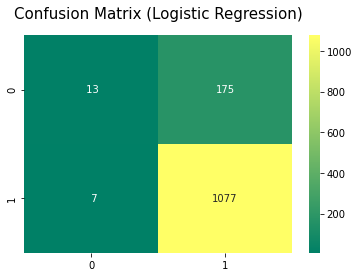

In [23]:
cnf_matrix = confusion_matrix(y_test, Y_pred_lr, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)

In [24]:
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  85.54


# Support Vector Machines

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X_test,y_test) * 100, 2)
print("Support Vector Machines Accuracy: ", acc_svc)

Support Vector Machines Accuracy:  85.3


In [26]:
cvs_svm = round((cross_val_score(svc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_svm)

Cross Validated Score: 84.79


In [27]:
class_report = classification_report(y_test, Y_pred_svm)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.57      0.02      0.04       188

    accuracy                           0.85      1272
   macro avg       0.71      0.51      0.48      1272
weighted avg       0.81      0.85      0.79      1272



Text(0.5, 1.05, 'Confusion Matrix (Support Vector Machines)')

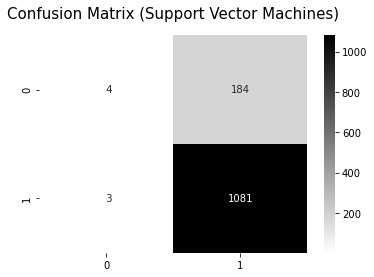

In [28]:
cnf_matrix = confusion_matrix(y_test, Y_pred_svm, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="binary")
plt.title('Confusion Matrix (Support Vector Machines)', y=1.05, size=15)

# XGBoost

In [29]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred_xgb = xgb.predict(X_test)
XGB_score = round(xgb.score(X_test,y_test) * 100, 2)
print("XGBoost Accuracy: ", XGB_score)

[01:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy:  83.81


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
cvs_xgb = round((cross_val_score(xgb, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_xgb)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [31]:
class_report = classification_report(y_test, Y_pred_xgb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1084
           1       0.35      0.11      0.17       188

    accuracy                           0.84      1272
   macro avg       0.61      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



Text(0.5, 1.05, 'Confusion Matrix (XGBoost)')

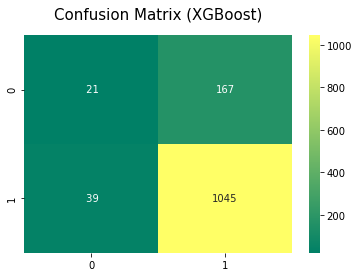

In [32]:
cnf_matrix = confusion_matrix(y_test, Y_pred_xgb, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (XGBoost)', y=1.05, size=15)